In [ ]:
#installations
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
((xtrain, ytrain), (xtest, ytest)) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
#xtrain=np.array(xtrain).reshape(60000,28,28)


xtrain = xtrain.reshape((xtrain.shape[0], 32*32*3))
xtest = xtest.reshape((xtest.shape[0], 32*32*3))
xtrain = xtrain.astype("float") / 255
xtest = xtest.astype("float") / 255.0

In [ ]:
lb = LabelBinarizer()
ytrain = lb.fit_transform(ytrain)
ytest = lb.transform(ytest)

In [ ]:
model = Sequential()
model.add(Dense(128, input_shape = (3072, ), activation = "sigmoid"))
model.add(Dense(64, activation = "sigmoid"))
model.add(Dense(10, activation = "softmax"))

In [ ]:
sgd = SGD(0.01)
epo = 10
model.compile(loss = "categorical_crossentropy", optimizer = sgd, metrics = ['accuracy'])
H = model.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = epo, batch_size = 128)

Epoch 1/10
391/391 [==============================] - 4s 11ms/step - loss: 2.3030 - accuracy: 0.0973 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/10
391/391 [==============================] - 4s 10ms/step - loss: 2.3031 - accuracy: 0.0961 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 2.3030 - accuracy: 0.0986 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 4/10
391/391 [==============================] - 4s 10ms/step - loss: 2.3030 - accuracy: 0.0983 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 5/10
391/391 [==============================] - 4s 10ms/step - loss: 2.3030 - accuracy: 0.0995 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 2.3031 - accuracy: 0.0984 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 7/10
391/391 [==============================] - 5s 13ms/step - loss: 2.3030 - accuracy: 0.0988 - val_loss: 2.3029 - val_accuracy: 0.1000

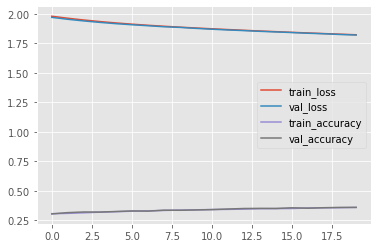

In [ ]:
pred = model.predict(xtest, batch_size = 10)
print(classification_report(ytest.argmax(axis = 1), pred.argmax(axis = 1)))
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epo), H.history["loss"], label = "train_loss")
plt.plot(np.arange(0, epo), H.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, epo), H.history["accuracy"], label = "train_accuracy")
plt.plot(np.arange(0, epo), H.history["val_accuracy"], label = "val_accuracy")
plt.legend()